# Project 2 - Car Insurance Claim Prediction

# Problem Statement:
The insurance industry faces the challenge of accurately predicting which policyholders will file claims amidst a growing customer base and diverse vehicle market. This inability to identify high-risk policyholders hampers effective risk assessment, premium pricing, customer service and resource allocation.
To address this challenge, we aim to develop a predictive model capable of forecasting policyholder claims within a six-month timeframe. By achieving this, insurance companies can significantly improve their risk management strategies, enhance customer satisfaction and optimize operational efficiency.

In [1]:
import pandas as pd
df=pd.read_csv("C://Users//Aayushi Kanojia//OneDrive//Desktop//Project 2.csv")

In [3]:
df.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   policy_tenure                     58592 non-null  float64
 2   age_of_car                        58592 non-null  float64
 3   age_of_policyholder               58592 non-null  float64
 4   area_cluster                      58592 non-null  object 
 5   population_density                58592 non-null  int64  
 6   make                              58592 non-null  int64  
 7   segment                           58592 non-null  object 
 8   model                             58592 non-null  object 
 9   fuel_type                         58592 non-null  object 
 10  max_torque                        58592 non-null  object 
 11  max_power                         58592 non-null  object 
 12  engi

# Found the missing values

In [7]:
df.isna().sum()

policy_id                           0
policy_tenure                       0
age_of_car                          0
age_of_policyholder                 0
area_cluster                        0
population_density                  0
make                                0
segment                             0
model                               0
fuel_type                           0
max_torque                          0
max_power                           0
engine_type                         0
airbags                             0
is_esc                              0
is_adjustable_steering              0
is_tpms                             0
is_parking_sensors                  0
is_parking_camera                   0
rear_brakes_type                    0
displacement                        0
cylinder                            0
transmission_type                   0
gear_box                            0
steering_type                       0
turning_radius                      0
length      

# Cleaned the dataset

In [19]:
df.drop(['policy_id'],inplace=True,axis=1)

In [21]:
df.shape

(58592, 43)

In [23]:
df.columns

Index(['policy_tenure', 'age_of_car', 'age_of_policyholder', 'area_cluster',
       'population_density', 'make', 'segment', 'model', 'fuel_type',
       'max_torque', 'max_power', 'engine_type', 'airbags', 'is_esc',
       'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'rear_brakes_type', 'displacement', 'cylinder',
       'transmission_type', 'gear_box', 'steering_type', 'turning_radius',
       'length', 'width', 'height', 'gross_weight', 'is_front_fog_lights',
       'is_rear_window_wiper', 'is_rear_window_washer',
       'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks',
       'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert', 'ncap_rating', 'is_claim'],
      dtype='object')

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 43 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_tenure                     58592 non-null  float64
 1   age_of_car                        58592 non-null  float64
 2   age_of_policyholder               58592 non-null  float64
 3   area_cluster                      58592 non-null  object 
 4   population_density                58592 non-null  int64  
 5   make                              58592 non-null  int64  
 6   segment                           58592 non-null  object 
 7   model                             58592 non-null  object 
 8   fuel_type                         58592 non-null  object 
 9   max_torque                        58592 non-null  object 
 10  max_power                         58592 non-null  object 
 11  engine_type                       58592 non-null  object 
 12  airb

# Performed the Encoding

In [25]:
from sklearn.preprocessing import LabelEncoder

In [27]:
le=LabelEncoder()

In [35]:
df['area_cluster'] = le.fit_transform(df['area_cluster'])
df['segment'] = le.fit_transform(df['segment'])
df['model'] = le.fit_transform(df['model'])
df['fuel_type'] = le.fit_transform(df['fuel_type'])
df['max_torque'] = le.fit_transform(df['max_torque'])
df['max_power'] = le.fit_transform(df['max_power'])
df['engine_type'] = le.fit_transform(df['engine_type'])
df['is_adjustable_steering'] = le.fit_transform(df['is_adjustable_steering'])
df['is_tpms'] = le.fit_transform(df['is_tpms'])
df['is_parking_sensors'] = le.fit_transform(df['is_parking_sensors'])
df['is_parking_camera'] = le.fit_transform(df['is_parking_camera'])
df['rear_brakes_type'] = le.fit_transform(df['rear_brakes_type'])
df['steering_type'] = le.fit_transform(df['steering_type'])
df['is_front_fog_lights'] = le.fit_transform(df['is_front_fog_lights'])
df['is_rear_window_wiper'] = le.fit_transform(df['is_rear_window_wiper'])
df['is_rear_window_washer'] = le.fit_transform(df['is_rear_window_washer'])
df['is_rear_window_defogger'] = le.fit_transform(df['is_rear_window_defogger'])
df['is_brake_assist'] = le.fit_transform(df['is_brake_assist'])
df['is_power_door_locks'] = le.fit_transform(df['is_power_door_locks'])
df['is_central_locking'] = le.fit_transform(df['is_central_locking'])
df['is_power_steering'] = le.fit_transform(df['is_power_steering'])
df['is_driver_seat_height_adjustable'] = le.fit_transform(df['is_driver_seat_height_adjustable'])
df['is_day_night_rear_view_mirror'] = le.fit_transform(df['is_day_night_rear_view_mirror'])
df['is_ecw'] = le.fit_transform(df['is_ecw'])
df['is_speed_alert'] = le.fit_transform(df['is_speed_alert'])
df['is_esc'] = le.fit_transform(df['is_esc'])
df['transmission_type'] = le.fit_transform(df['transmission_type'])

In [37]:
df.head()

,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,0.515874,0.05,0.644231,0,4990,1,0,0,0,5,...,0,0,0,1,0,0,0,1,0,0
1,0.672619,0.02,0.375000,11,27003,1,0,0,0,5,...,0,0,0,1,0,0,0,1,0,0
2,0.841110,0.02,0.384615,15,4076,1,0,0,0,5,...,0,0,0,1,0,0,0,1,0,0
3,0.900277,0.11,0.432692,16,21622,1,3,3,2,0,...,1,1,1,1,1,1,1,1,2,0
4,0.596403,0.11,0.634615,17,34738,2,0,4,2,8,...,0,1,1,1,0,1,1,1,2,0


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 43 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_tenure                     58592 non-null  float64
 1   age_of_car                        58592 non-null  float64
 2   age_of_policyholder               58592 non-null  float64
 3   area_cluster                      58592 non-null  int32  
 4   population_density                58592 non-null  int64  
 5   make                              58592 non-null  int64  
 6   segment                           58592 non-null  int32  
 7   model                             58592 non-null  int32  
 8   fuel_type                         58592 non-null  int32  
 9   max_torque                        58592 non-null  int32  
 10  max_power                         58592 non-null  int32  
 11  engine_type                       58592 non-null  int32  
 12  airb

# Trained and Tested the dataset

In [41]:
from sklearn.model_selection import train_test_split

In [43]:
X=df[['policy_tenure', 'age_of_car', 'age_of_policyholder', 'area_cluster',
       'population_density', 'make', 'segment', 'model', 'fuel_type',
       'max_torque', 'max_power', 'engine_type', 'airbags', 'is_esc',
       'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'rear_brakes_type', 'displacement', 'cylinder',
       'transmission_type', 'gear_box', 'steering_type', 'turning_radius',
       'length', 'width', 'height', 'gross_weight', 'is_front_fog_lights',
       'is_rear_window_wiper', 'is_rear_window_washer',
       'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks',
       'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert', 'ncap_rating']]

In [47]:
Y=df[['is_claim']]

In [49]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=1,stratify=Y) #70% training part

# Performed the model based on Decision Tree algorithm

In [51]:
from sklearn.tree import DecisionTreeClassifier as dtree

In [53]:
dt = dtree()

In [55]:
dt.fit(X_train,Y_train)

DecisionTreeClassifier()

In [57]:
Y_pred = dt.predict(X_test)

In [59]:
Y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [61]:
Y_test

,is_claim
23496,0
14214,0
44729,0
51419,0
3415,0
...,...
4128,0
19568,0
2068,0
47906,0


In [63]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [65]:
print('Decision Tree Classifier')
print("accuracy: ",accuracy_score(Y_test, Y_pred), "precision:",precision_score(Y_test, Y_pred),"recall:", recall_score(Y_test, Y_pred) , "f1_score:", f1_score(Y_test, Y_pred))

Decision Tree Classifier
accuracy:  0.8704630788485607 precision: 0.08495320374370051 recall: 0.10498220640569395 f1_score: 0.0939116593712694


In [67]:
import pandas as pd
feature_imp = pd.Series(dt.feature_importances_,index=X_train.columns).sort_values(ascending=False)
feature_imp

policy_tenure                       0.482973
age_of_policyholder                 0.176778
age_of_car                          0.113784
area_cluster                        0.064567
population_density                  0.061830
model                               0.010761
gross_weight                        0.007646
height                              0.006105
width                               0.005796
engine_type                         0.005418
turning_radius                      0.005076
ncap_rating                         0.004721
segment                             0.004127
max_torque                          0.003822
max_power                           0.003549
fuel_type                           0.003142
displacement                        0.003131
length                              0.003119
cylinder                            0.002607
steering_type                       0.002541
is_parking_camera                   0.002443
is_front_fog_lights                 0.002179
is_rear_wi

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


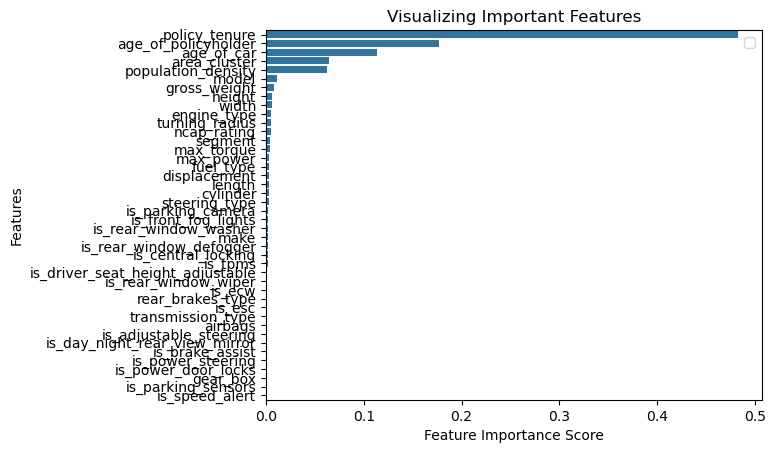

In [69]:
#visualizing feature importance results
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

[Text(0.5, 0.875, 'node #0\npolicy_tenure <= 0.377\ngini = 0.12\nsamples = 41014\nvalue = [38390.0, 2624.0]\nclass = Not Claimed'),
 Text(0.25, 0.625, 'node #1\nage_of_car <= 0.005\ngini = 0.079\nsamples = 15411\nvalue = [14779, 632]\nclass = Not Claimed'),
 Text(0.125, 0.375, 'node #2\nmodel <= 0.5\ngini = 0.185\nsamples = 2360\nvalue = [2116.0, 244.0]\nclass = Not Claimed'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'node #783\npolicy_tenure <= 0.1\ngini = 0.058\nsamples = 13051\nvalue = [12663, 388]\nclass = Not Claimed'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'node #2440\nage_of_car <= 0.145\ngini = 0.144\nsamples = 25603\nvalue = [23611, 1992]\nclass = Not Claimed'),
 Text(0.625, 0.375, 'node #2441\npolicy_tenure <= 0.788\ngini = 0.149\nsamples = 22649\nvalue = [20808, 1841]\nclass = Not Claimed'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)

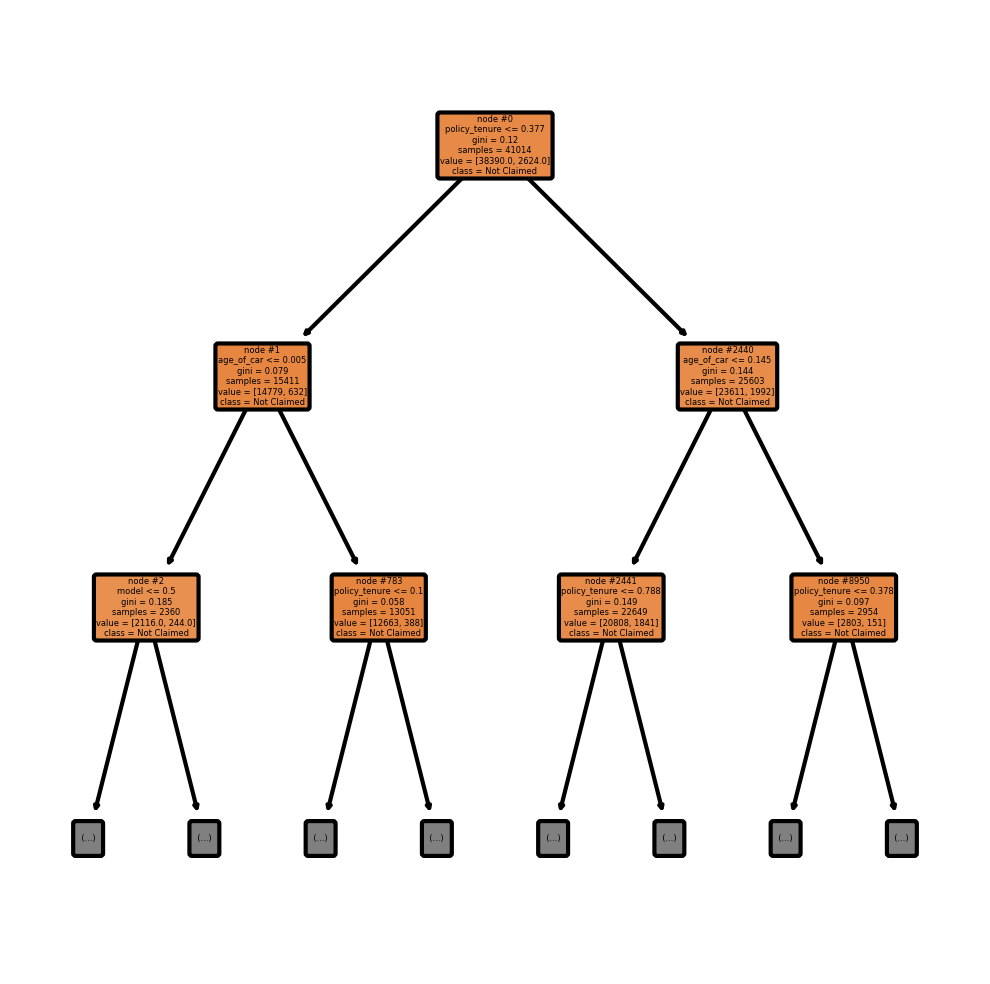

In [71]:
from sklearn import tree
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi = 300)

tree.plot_tree(dt, max_depth = 2,  # Draw upto depth of 3
            rounded = True, # Rounded boxes
            filled = True,  # Boxes filled with color
            impurity = True,# Show impurity level
            node_ids = True,# Display node_id
            feature_names = ['policy_tenure', 'age_of_car', 'age_of_policyholder', 'area_cluster',
       'population_density', 'make', 'segment', 'model', 'fuel_type',
       'max_torque', 'max_power', 'engine_type', 'airbags', 'is_esc',
       'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'rear_brakes_type', 'displacement', 'cylinder',
       'transmission_type', 'gear_box', 'steering_type', 'turning_radius',
       'length', 'width', 'height', 'gross_weight', 'is_front_fog_lights',
       'is_rear_window_wiper', 'is_rear_window_washer',
       'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks',
       'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert', 'ncap_rating'],
            class_names = ["Not Claimed","claimed"]
              )

In [87]:
!pip install catboost
from catboost import CatBoostClassifier

   ---------------------------------------- 0.0/101.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/101.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/101.1 MB ? eta -:--:--
   ---------------------------------------- 0.1/101.1 MB 991.0 kB/s eta 0:01:42
   ---------------------------------------- 0.2/101.1 MB 1.6 MB/s eta 0:01:05
   ---------------------------------------- 0.7/101.1 MB 3.5 MB/s eta 0:00:29
    --------------------------------------- 1.4/101.1 MB 5.1 MB/s eta 0:00:20
    --------------------------------------- 2.4/101.1 MB 7.6 MB/s eta 0:00:13
   - -------------------------------------- 3.0/101.1 MB 8.4 MB/s eta 0:00:12
   - -------------------------------------- 4.1/101.1 MB 10.0 MB/s eta 0:00:10
   - -------------------------------------- 4.9/101.1 MB 10.8 MB/s eta 0:00:09
   -- ------------------------------------- 5.8/101.1 MB 11.7 MB/s eta 0:00:09
   -- ------------------------------------- 7.0/101.1 MB 12.7 MB/s eta 0:00:08
 

# Performed the model based on catboost algorithm

In [88]:
cat = CatBoostClassifier()

In [91]:
cat.fit(X_train, Y_train)

# Predict on test set
cat_pred_Y = dt.predict(X_test)

# accuracy
acc_cat = accuracy_score(Y_test, cat_pred_Y)
print("Cat Boosting Classifier accuracy is : {:.2f}".format(acc_cat))

Learning rate set to 0.05031
0:	learn: 0.6351858	total: 193ms	remaining: 3m 12s
1:	learn: 0.5856485	total: 214ms	remaining: 1m 46s
2:	learn: 0.5424412	total: 250ms	remaining: 1m 22s
3:	learn: 0.5046720	total: 272ms	remaining: 1m 7s
4:	learn: 0.4708764	total: 294ms	remaining: 58.5s
5:	learn: 0.4419993	total: 317ms	remaining: 52.5s
6:	learn: 0.4170080	total: 334ms	remaining: 47.3s
7:	learn: 0.3950704	total: 354ms	remaining: 43.9s
8:	learn: 0.3752349	total: 379ms	remaining: 41.7s
9:	learn: 0.3586363	total: 401ms	remaining: 39.7s
10:	learn: 0.3434786	total: 435ms	remaining: 39.1s
11:	learn: 0.3301598	total: 463ms	remaining: 38.1s
12:	learn: 0.3185112	total: 485ms	remaining: 36.8s
13:	learn: 0.3088937	total: 501ms	remaining: 35.3s
14:	learn: 0.3004286	total: 522ms	remaining: 34.3s
15:	learn: 0.2929933	total: 543ms	remaining: 33.4s
16:	learn: 0.2864672	total: 563ms	remaining: 32.5s
17:	learn: 0.2804032	total: 582ms	remaining: 31.8s
18:	learn: 0.2749900	total: 608ms	remaining: 31.4s
19:	learn

In [93]:
print('Cat Boosting Classifier')
print("accuracy: ",accuracy_score(Y_test, cat_pred_Y), "precision:",precision_score(Y_test, cat_pred_Y),"recall:", recall_score(Y_test, cat_pred_Y) , "f1_score:", f1_score(Y_test, cat_pred_Y))

Cat Boosting Classifier
accuracy:  0.8704630788485607 precision: 0.08495320374370051 recall: 0.10498220640569395 f1_score: 0.0939116593712694


# Used a new record and predicted

In [105]:
new_data = pd.read_csv("C://Users//Aayushi Kanojia//OneDrive//Desktop//new_data.csv")

In [107]:
new_data

,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,...,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating
0,0.515874,0.05,0.644231,1,4990,1,2,1,1,1,...,0,0,0,0,1,0,0,0,1,0
1,0.672619,0.02,0.375000,2,27003,1,2,1,1,1,...,0,0,0,0,1,0,0,0,1,0
2,0.841110,0.02,0.384615,3,4076,1,2,1,1,1,...,0,0,0,0,1,0,0,0,1,0
3,0.900277,0.11,0.432692,4,21622,1,4,2,2,2,...,1,1,1,1,1,1,1,1,1,2
4,0.596403,0.11,0.634615,5,34738,2,2,3,2,3,...,0,0,1,1,1,0,1,1,1,2


In [109]:
dt.predict(new_data)

array([0, 0, 0, 0, 1], dtype=int64)

In [111]:
cat.predict(new_data)

array([0, 0, 0, 0, 0], dtype=int64)

# Performance analysis between Decision Tree and CatBoost algorithms

Decision Tree Classifier
accuracy:  0.8704630788485607 precision: 0.08495320374370051 recall: 0.10498220640569395 f1_score: 0.0939116593712694

#Accuracy is 0.87 which tells the model correctly predicts the outcomes 87%. This value is good for the model as it is above 70%.
#Precision is 0.08, which is a average value as it indicates that only 8%, we can expect results with very less variation. This is an major negative aspect.
#Recall is 0.105 This is a very bad indicator as 90% the model wouldn’t correctly identify positive instances (true positives) from all the actual positive samples in the dataset. This tells we can’t rely on the model.
#F1 Score is 0.094. With the F1 score again being very low value, this shows that the model performs very bad.

Cat Boosting Classifier
accuracy:  0.8704630788485607 precision: 0.08495320374370051 recall: 0.10498220640569395 f1_score: 0.0939116593712694

#Accuracy is 0.87 which tells the model correctly predicts the outcomes 87%. This value is good for the model as it is above 70%.
#Precision is 0.08, which is a low value as it indicates that 92%, we can expect results with very high variation.
#Recall is 0.105 This is a very bad indicator as 90% the model wouldn’t correctly identify positive instances (true positives) from all the actual positive samples in the dataset. This tells we can’t rely on the model.
#F1 Score is 0.094. With the F1 score again being very low value, this shows that the model performs very bad. 

Overall, With all values being the same for all the metrics in both the models, the better model is Cat Boosting, because there is an overfitting problem in the decision tree. Cat Boosting overcomes a limitation of other decision tree-based methods in which, typically, the data must be pre-processed to convert categorical string variables to numerical values, one-hot-encodings and so on.

